In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [2]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [3]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

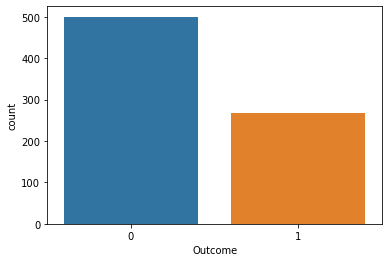

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
sns.countplot(df['Outcome'])

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

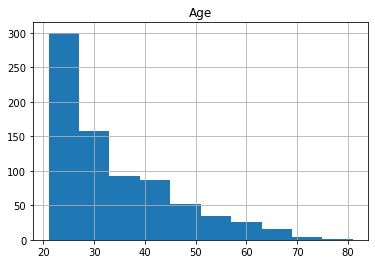

In [9]:
df.hist('Age')

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

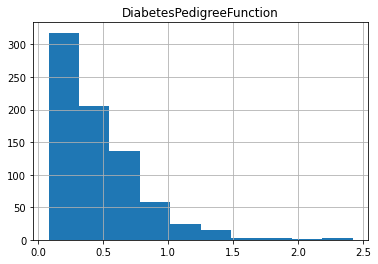

In [10]:
df.hist('DiabetesPedigreeFunction')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


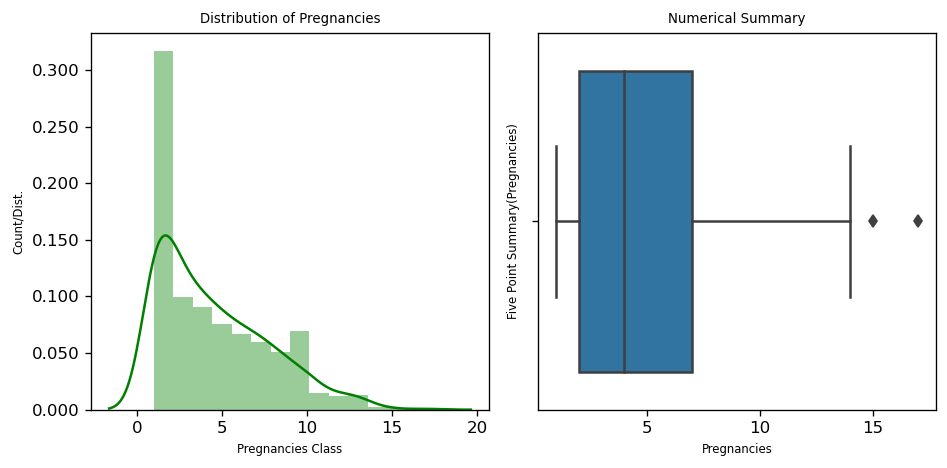

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Pregnancies']!=0]['Pregnancies'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Pregnancies']!=0]['Pregnancies'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Pregnancies)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


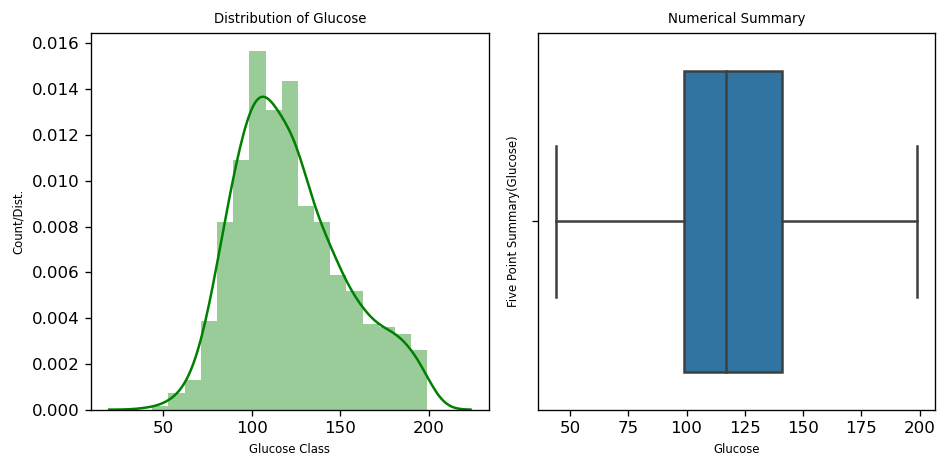

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


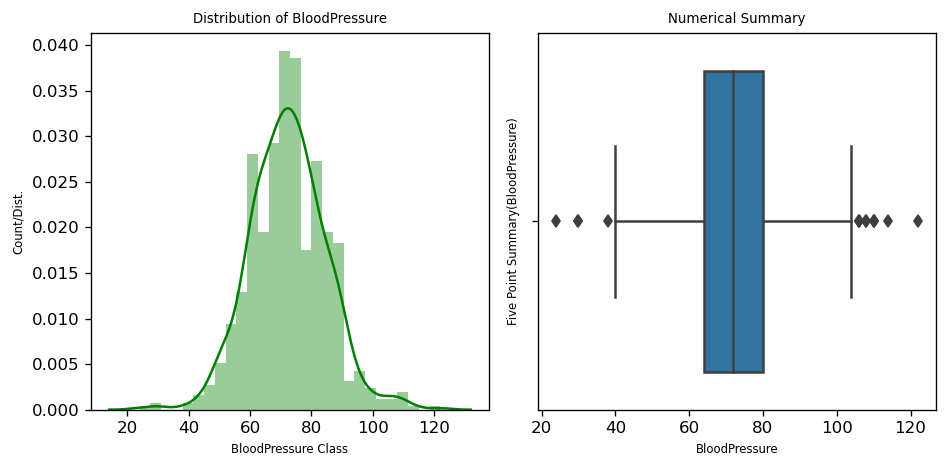

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BloodPressure)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


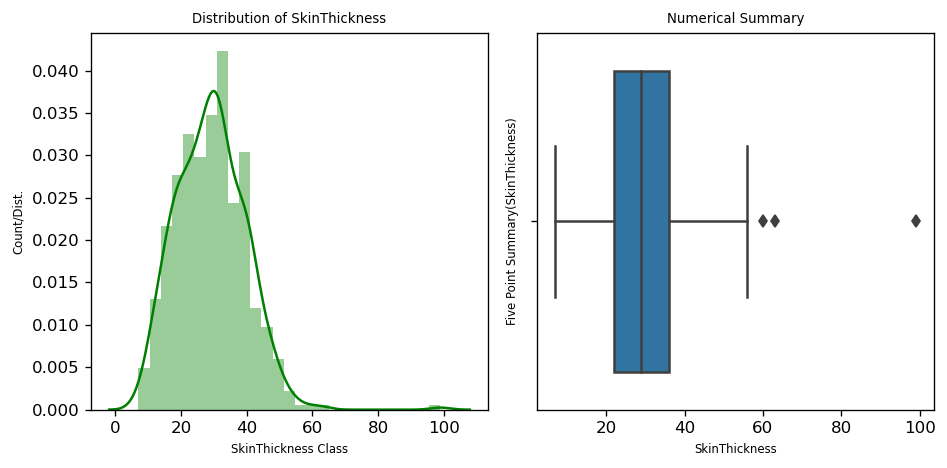

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


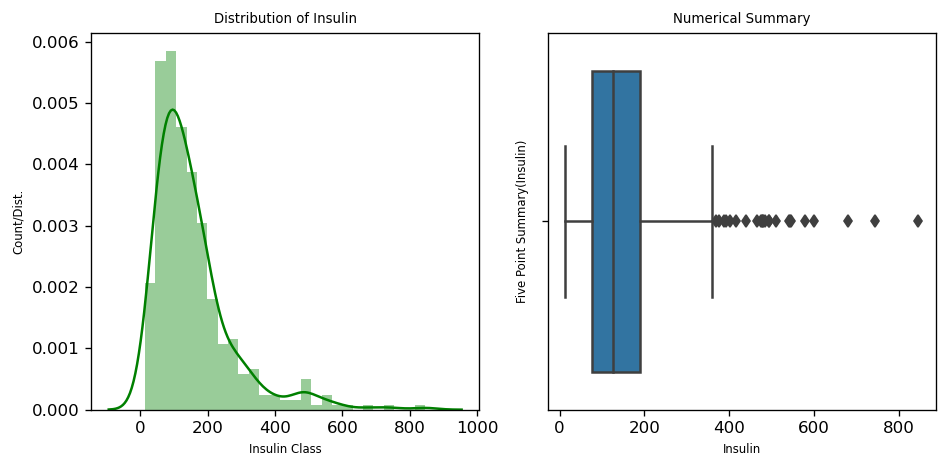

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Insulin']!=0]['Insulin'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Insulin']!=0]['Insulin'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Insulin',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


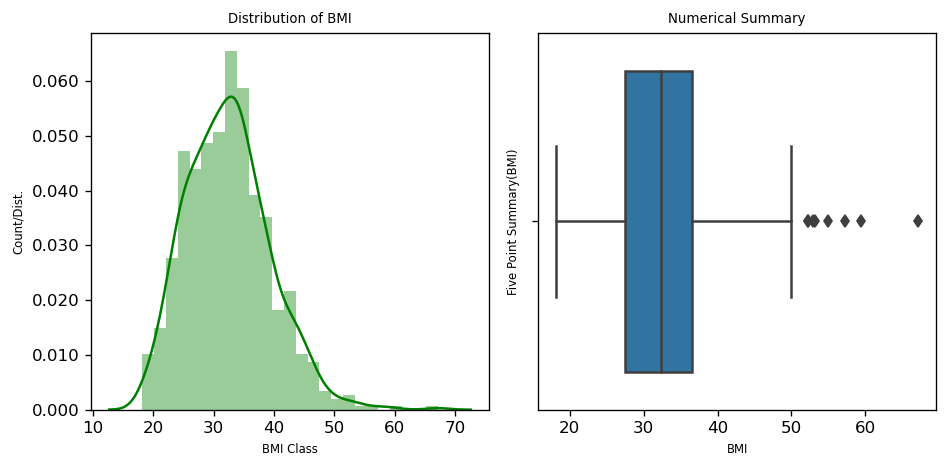

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BMI']!=0]['BMI'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BMI']!=0]['BMI'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BMI',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.tight_layout()

In [11]:
df_copy=df.copy()
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
import numpy as np
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [14]:
df_copy_diabetic = df_copy[df_copy.Outcome==1]
df_copy_diabetic.head()
df_copy_diabetic.count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [15]:
df_copy_non_diabetic = df_copy[df_copy.Outcome==0]
df_copy_non_diabetic.head()
df_copy_non_diabetic.count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [75]:
df_copy.Outcome.replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(df_copy.Outcome.value_counts())
n = df_copy.shape[0]
diabetic = df_copy.Outcome.value_counts().loc['Diab']
import statsmodels.api as sm
print("\n95% Confidence Interval for Proportion of People with Diabetes is:",sm.stats.proportion_confint(diabetic, n))

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64

95% Confidence Interval for Proportion of People with Diabetes is: (0.3152483405027714, 0.38266832616389523)


In [82]:
import statistics
from statistics import *
df_diabetic = df_copy[df_copy.Outcome=='Diab']
df_diabetic.head()
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (4.417756079185482, 5.313587204396608)


In [83]:
df_non_diabetic = df_copy[df_copy.Outcome=='Non-Diab']
df_non_diabetic.head()
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (3.033536970425177, 3.562463029574823)


In [104]:
print(np.std(df_diabetic['Pregnancies']))

3.7342525971531524


In [105]:
print(np.std(df_non_diabetic['Pregnancies']))

3.014165887936496


In [147]:
from math import sqrt
from scipy.stats import t
N1 = 30
N2 = 30
df = (N1 + N2 - 2)
std1=np.std(df_diabetic['Pregnancies'])
std2=np.std(df_non_diabetic['Pregnancies'])
std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
print(std_N1N2)
diff_mean = np.mean(df_diabetic['Pregnancies'])- np.mean(df_non_diabetic[ 'Pregnancies'])
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))


3.393363998994587

The difference between groups is 1.6 [-0.2 to 3.3] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


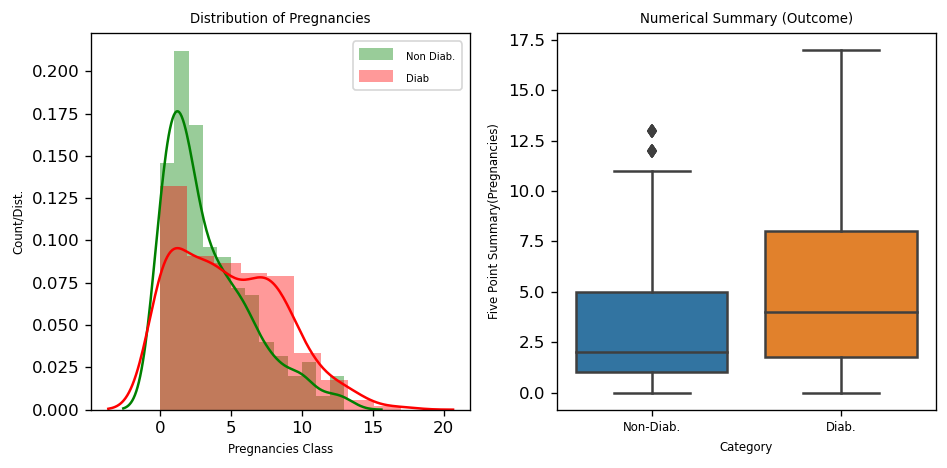

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Pregnancies'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Pregnancies'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Pregnancies',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Pregnancies)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [17]:
df_copy_diabetic_sample_preg=df_copy_diabetic['Pregnancies']
df_copy_non_diabetic_sample_preg=df_copy_non_diabetic['Pregnancies']

stats.ttest_ind(df_copy_diabetic_sample_preg, df_copy_non_diabetic_sample_preg)

Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)

In [134]:
import pingouin as pg

res = pg.ttest(df_diabetic['Pregnancies'], df_non_diabetic['Pregnancies'], correction=False)
display(res)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  6.298431  766   two-sided  5.065127e-10  [1.08, 2.06]  0.476827   

            BF10  power  
T-test  1.51e+07    1.0

In [84]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['Glucose']).zconfint_mean())


95% C.I. with statsmodels library: (138.62872061103184, 145.7024251020802)


In [85]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['Glucose']).zconfint_mean())


95% C.I. with statsmodels library: (108.5436145142335, 112.87662663910857)


In [106]:
print(np.std(df_diabetic['Glucose']))

29.486583602423828


In [107]:
print(np.std(df_non_diabetic['Glucose']))

24.692331022243224


In [146]:
std1_glu=np.std(df_diabetic['Glucose'])
std2_glu=np.std(df_non_diabetic['Glucose'])
std_N1N2_glu = np.sqrt( ((N1 - 1)*(std1_glu)**2 + (N2 - 1)*(std2_glu)**2) / df) 
print(std_N1N2_glu)
diff_mean_glu = np.mean(df_diabetic['Glucose'])- np.mean(df_non_diabetic[ 'Glucose'])
MoE_glu = t.ppf(0.975, df) * std_N1N2_glu * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_glu, diff_mean_glu - MoE_glu, diff_mean_glu + MoE_glu))


27.195310476760184

The difference between groups is 31.5 [17.4 to 45.5] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


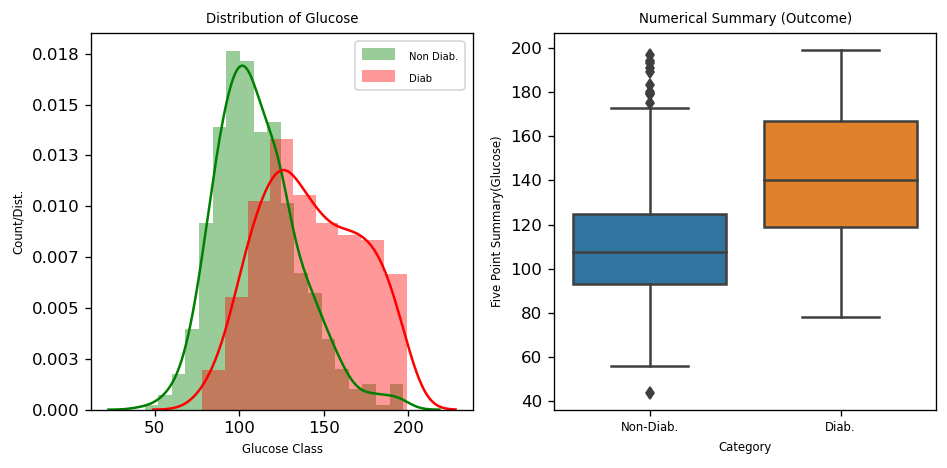

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Glucose'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Glucose'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Glucose',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [19]:
df_copy_diabetic_sample_glu=df_copy_diabetic['Glucose']
df_copy_non_diabetic_sample_glu=df_copy_non_diabetic['Glucose']

stats.ttest_ind(df_copy_diabetic_sample_glu, df_copy_non_diabetic_sample_glu)

Ttest_indResult(statistic=15.679898231208346, pvalue=2.909251656846456e-48)

In [135]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_glu, df_copy_non_diabetic_sample_glu, correction=False)
display(res)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  15.679898  766   two-sided  2.909252e-48  [27.52, 35.39]  1.187057   

             BF10  power  
T-test  5.179e+44    1.0

In [95]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['BloodPressure']).zconfint_mean())


95% C.I. with statsmodels library: (73.71713767670296, 76.57751117996865)


In [96]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['BloodPressure']).zconfint_mean())


95% C.I. with statsmodels library: (69.88961502717545, 71.98117897009602)


In [108]:
print(np.std(df_diabetic['BloodPressure']))

11.92340485030661


In [109]:
print(np.std(df_non_diabetic['BloodPressure']))

11.91909640323755


In [145]:
std1_BP=np.std(df_diabetic['BloodPressure'])
std2_BP=np.std(df_non_diabetic['BloodPressure'])
std_N1N2_BP = np.sqrt( ((N1 - 1)*(std1_BP)**2 + (N2 - 1)*(std2_BP)**2) / df) 
print(std_N1N2_BP)
diff_mean_BP = np.mean(df_diabetic['BloodPressure'])- np.mean(df_non_diabetic[ 'BloodPressure'])
MoE_BP = t.ppf(0.975, df) * std_N1N2_BP * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_BP, diff_mean_BP - MoE_BP, diff_mean_BP + MoE_BP))


11.921250821411013

The difference between groups is 4.2 [-1.9 to 10.4] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


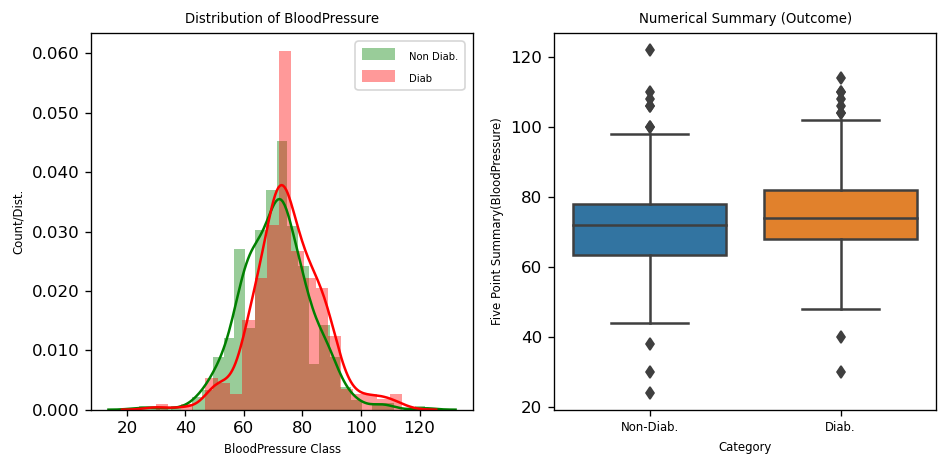

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['BloodPressure'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['BloodPressure'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='BloodPressure',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(BloodPressure)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [21]:
df_copy_diabetic_sample_blood=df_copy_diabetic['BloodPressure']
df_copy_non_diabetic_sample_blood=df_copy_non_diabetic['BloodPressure']

stats.ttest_ind(df_copy_diabetic_sample_blood, df_copy_non_diabetic_sample_blood)

Ttest_indResult(statistic=4.661098993631144, pvalue=3.709288185093571e-06)

In [136]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_blood, df_copy_non_diabetic_sample_blood, correction=False)
display(res)

T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  4.661099  766   two-sided  0.000004  [2.44, 5.99]  0.352871  3106.059   

           power  
T-test  0.996484

In [93]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['SkinThickness']).zconfint_mean())


95% C.I. with statsmodels library: (30.649400162010707, 32.723734166347505)


In [94]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['SkinThickness']).zconfint_mean())


95% C.I. with statsmodels library: (26.97631323552249, 28.47568676447751)


In [110]:
print(np.std(df_diabetic['SkinThickness']))

8.646816263759764


In [111]:
print(np.std(df_non_diabetic['SkinThickness']))

8.544408932161433


In [144]:
std1_st=np.std(df_diabetic['SkinThickness'])
std2_st=np.std(df_non_diabetic['SkinThickness'])
std_N1N2_st = np.sqrt( ((N1 - 1)*(std1_st)**2 + (N2 - 1)*(std2_st)**2) / df) 
print(std_N1N2_st)
diff_mean_st = np.mean(df_diabetic['SkinThickness'])- np.mean(df_non_diabetic[ 'SkinThickness'])
MoE_st = t.ppf(0.975, df) * std_N1N2_st * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_st, diff_mean_st - MoE_st, diff_mean_st + MoE_st))


8.595765105539485

The difference between groups is 4.0 [-0.5 to 8.4] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


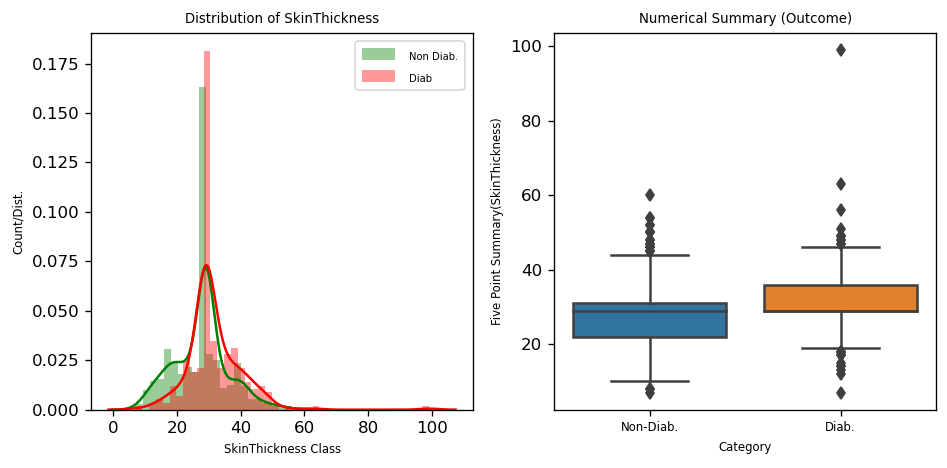

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['SkinThickness'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['SkinThickness'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='SkinThickness',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [23]:
df_copy_diabetic_sample_skin=df_copy_diabetic['SkinThickness']
df_copy_non_diabetic_sample_skin=df_copy_non_diabetic['SkinThickness']

stats.ttest_ind(df_copy_diabetic_sample_skin, df_copy_non_diabetic_sample_skin)

Ttest_indResult(statistic=6.089214889295934, pvalue=1.7939583262325828e-09)

In [137]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_skin, df_copy_non_diabetic_sample_skin, correction=False)
display(res)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  6.089215  766   two-sided  1.793958e-09  [2.68, 5.24]  0.460988   

            BF10  power  
T-test  4.48e+06    1.0

In [91]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['Insulin']).zconfint_mean())


95% C.I. with statsmodels library: (152.61749459803647, 176.7854904765904)


In [92]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['Insulin']).zconfint_mean())


95% C.I. with statsmodels library: (121.2665115646579, 134.31748843534209)


In [112]:
print(np.std(df_diabetic['Insulin']))

100.74376613807301


In [113]:
print(np.std(df_non_diabetic['Insulin']))

74.37298391217081


In [143]:
std1_in=np.std(df_diabetic['Insulin'])
std2_in=np.std(df_non_diabetic['Insulin'])
std_N1N2_in = np.sqrt( ((N1 - 1)*(std1_in)**2 + (N2 - 1)*(std2_in)**2) / df) 
print(std_N1N2_in)
diff_mean_in = np.mean(df_diabetic['Insulin'])- np.mean(df_non_diabetic[ 'Insulin'])
MoE_in = t.ppf(0.975, df) * std_N1N2_in * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_in, diff_mean_in - MoE_in, diff_mean_in + MoE_in))


88.54560167417341

The difference between groups is 36.9 [-8.9 to 82.7] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


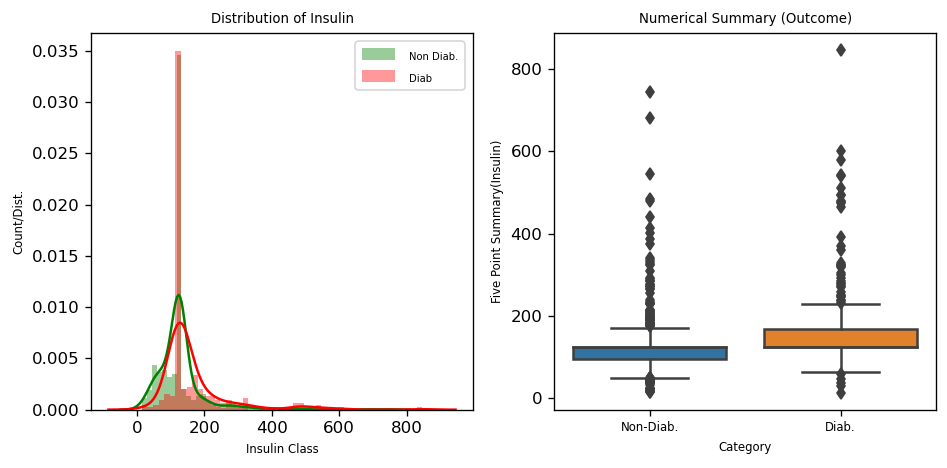

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Insulin'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Insulin'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Insulin',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [25]:
df_copy_diabetic_sample_in=df_copy_diabetic['Insulin']
df_copy_non_diabetic_sample_in=df_copy_non_diabetic['Insulin']

stats.ttest_ind(df_copy_diabetic_sample_in, df_copy_non_diabetic_sample_in)

Ttest_indResult(statistic=5.76114539252401, pvalue=1.210025703412445e-08)

In [138]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_in, df_copy_non_diabetic_sample_in, correction=False)
display(res)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  5.761145  766   two-sided  1.210026e-08  [24.33, 49.49]  0.436151   

             BF10     power  
T-test  7.186e+05  0.999926

In [88]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['BMI']).zconfint_mean())


95% C.I. with statsmodels library: (34.59393109008517, 36.1732330890193)


In [90]:
print("95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['BMI']).zconfint_mean())

95% C.I. with statsmodels library: (30.31549852713079, 31.45570147286921)


In [114]:
print(np.std(df_diabetic['BMI']))

6.583286096270681


In [115]:
print(np.std(df_non_diabetic['BMI']))

6.497620536781139


In [142]:
std1_BMI=np.std(df_diabetic['BMI'])
std2_BMI=np.std(df_non_diabetic['BMI'])
std_N1N2_BMI = np.sqrt( ((N1 - 1)*(std1_BMI)**2 + (N2 - 1)*(std2_BMI)**2) / df) 
print(std_N1N2_BMI)
diff_mean_BMI = np.mean(df_diabetic['BMI'])- np.mean(df_non_diabetic[ 'BMI'])
MoE_BMI = t.ppf(0.975, df) * std_N1N2_BMI * sqrt(1/N1 + 1/N2)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_BMI, diff_mean_BMI - MoE_BMI, diff_mean_BMI + MoE_BMI))


6.54059356883421

The difference between groups is 4.5 [1.1 to 7.9] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


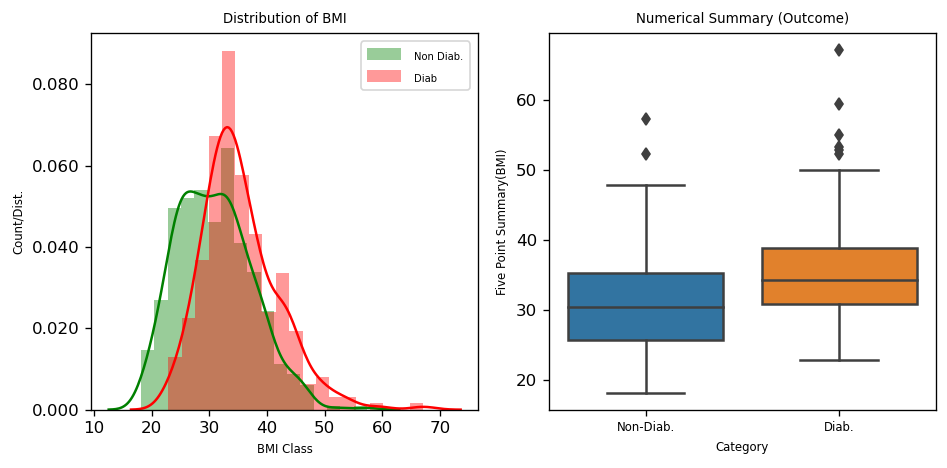

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['BMI'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['BMI'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='BMI',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [27]:
df_copy_diabetic_sample_bmi=df_copy_diabetic['BMI']
df_copy_non_diabetic_sample_bmi=df_copy_non_diabetic['BMI']

stats.ttest_ind(df_copy_diabetic_sample_bmi, df_copy_non_diabetic_sample_bmi)

Ttest_indResult(statistic=9.090064413986648, pvalue=8.336902677509037e-19)

In [140]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_bmi, df_copy_non_diabetic_sample_bmi, correction=False)
display(res)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  9.090064  766   two-sided  8.336903e-19  [3.53, 5.47]  0.688169   

             BF10  power  
T-test  5.083e+15    1.0

In [86]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['Age']).zconfint_mean())


95% C.I. with statsmodels library: (35.754002564017284, 38.38032579419168)


In [87]:
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['Age']).zconfint_mean())


95% C.I. with statsmodels library: (30.167303757946897, 32.212696242053106)


In [116]:
print(np.std(df_diabetic['Age']))

10.947771368103606


In [117]:
print(np.std(df_non_diabetic['Age']))

11.655981297170998


In [132]:
std1_Age=np.std(df_diabetic['Age'])
std2_Age=np.std(df_non_diabetic['Age'])
std_N1N2_Age = np.sqrt( ((N1 - 1)*(std1_Age)**2 + (N2 - 1)*(std2_Age)**2) / df) 

diff_mean_Age = np.mean(df_diabetic['Age'])- np.mean(df_non_diabetic[ 'Age'])
MoE_Age = t.ppf(0.975, df) * std_N1N2_Age * sqrt(1/N1 + 1/N2)
print(std_N1N2_Age)
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean_Age, diff_mean_Age - MoE_Age, diff_mean_Age + MoE_Age))


11.307422295295007

The difference between groups is 5.9 [0.0 to 11.7] (mean [95% CI])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


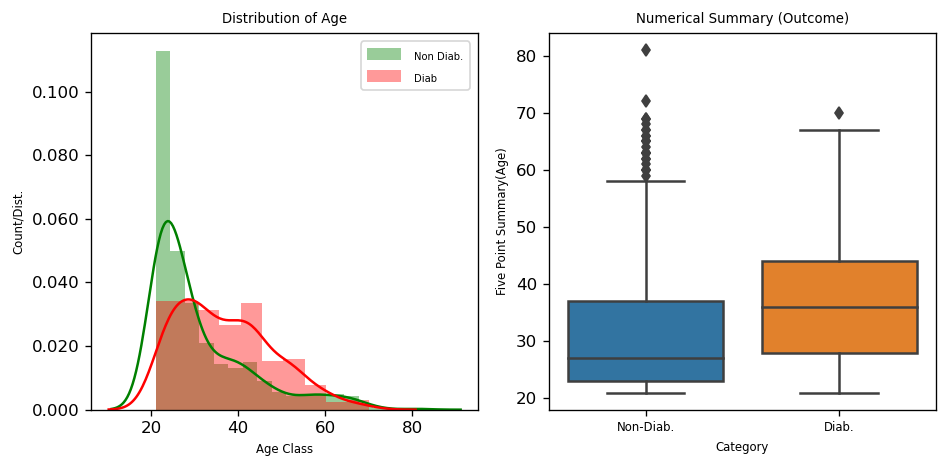

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Age'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Age'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Age',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Age)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [29]:
df_copy_diabetic_sample_age=df_copy_diabetic['Age']
df_copy_non_diabetic_sample_age=df_copy_non_diabetic.sample(30)['Age']

stats.ttest_ind(df_copy_diabetic_sample_age, df_copy_non_diabetic_sample_age)

Ttest_indResult(statistic=0.9508756195210635, pvalue=0.3424432758564987)

In [141]:
import pingouin as pg

res = pg.ttest(df_copy_diabetic_sample_age, df_copy_non_diabetic_sample_age, correction=False)
display(res)

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.950876  296   two-sided  0.342443  [-2.21, 6.35]  0.183064  0.305   

           power  
T-test  0.157548

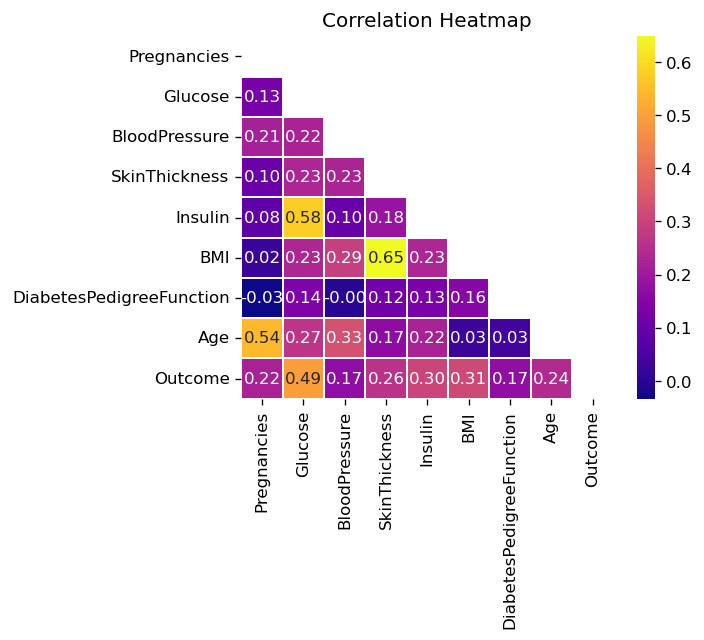

In [30]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_copy.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#3. Conduct Multiple Linear Regression and ANOVA modeling on the dataset. What do each modeling step reveal?

In [31]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [32]:
X = df_copy[['Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_copy['Outcome']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.016386
Glucose                      0.006651
BloodPressure               -0.002091
SkinThickness               -0.000847
Insulin                     -0.000236
BMI                          0.015503
DiabetesPedigreeFunction     0.124008
Age                          0.002990

In [36]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
661       1   1.051964
122       0   0.213608
113       0   0.070809
14        1   0.636426
529       0   0.137337
..      ...        ...
476       1   0.211130
482       0   0.065213
230       1   0.637136
527       0   0.154356
380       0   0.216947

[154 rows x 2 columns]

In [37]:
from sklearn import metrics

print('R squared: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R squared: 31.95
Mean Absolute Error: 0.3086195288370292
Mean Squared Error: 0.13931498760305186
Root Mean Squared Error: 0.3732492298760332


In [148]:
lm = pg.linear_regression(X_train, y_train)
lm

names      coef        se          T          pval  \
0                 Intercept -0.966810  0.118009  -8.192648  1.525441e-15   
1               Pregnancies  0.016386  0.005607   2.922614  3.600731e-03   
2                   Glucose  0.006651  0.000632  10.523604  6.739880e-24   
3             BloodPressure -0.002091  0.001503  -1.390922  1.647605e-01   
4             SkinThickness -0.000847  0.002206  -0.383737  7.013079e-01   
5                   Insulin -0.000236  0.000203  -1.161373  2.459482e-01   
6                       BMI  0.015503  0.002940   5.272991  1.870936e-07   
7  DiabetesPedigreeFunction  0.124008  0.049853   2.487477  1.313353e-02   
8                       Age  0.002990  0.001719   1.738617  8.261091e-02   

         r2    adj_r2  CI[2.5%]  CI[97.5%]  
0  0.312348  0.303255 -1.198568  -0.735052  
1  0.312348  0.303255  0.005375   0.027397  
2  0.312348  0.303255  0.005410   0.007892  
3  0.312348  0.303255 -0.005044   0.000861  
4  0.312348  0.303255 -0.005179   0.003486  
5  0.312348  0.303255 -0.000635   0.000163  
6  0.312348  0.303255  0.009729   0.021277  
7  0.312348  0.303255  0.026102   0.221913  
8  0.312348  0.303255 -0.000387   0.006366

In [38]:
y.mean()

0.3489583333333333

In [69]:
#ANOVA

In [39]:
df_copy.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [74]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [40]:
category1=pd.cut(df_copy.Age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
#df_copy=df_copy.drop('AgeBin', axis=1)
df_copy.insert(7,'AgeBin',category1)
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction AgeBin  Age  Outcome  
0                     0.627  48-58   50        1  
1                     0.351  28-38   31        0  
2                     0.672  28-38   32        1  
3                     0.167  18-28   21        0  
4                     2.288  28-38   33        1

[Text(0.5, 1.0, 'AgeBIN Vs Outcomes')]

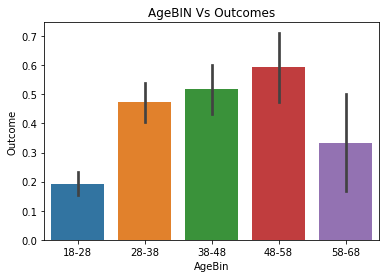

In [41]:
sns.barplot(x=df_copy.AgeBin,y=df_copy.Outcome).set(title='AgeBIN Vs Outcomes')

In [42]:
df2=pd.DataFrame({'18-28':df_copy[df_copy['AgeBin']=='18-28']['Outcome'],
                 '28-38':df_copy[df_copy['AgeBin']=='28-38']['Outcome'],
                 '38-48':df_copy[df_copy['AgeBin']=='38-48']['Outcome'],
                 '48-58':df_copy[df_copy['AgeBin']=='48-58']['Outcome'],
                '58-68':df_copy[df_copy['AgeBin']=='58-68']['Outcome']
                 })
df2.head()

18-28  28-38  38-48  48-58  58-68
0    NaN    NaN    NaN    1.0    NaN
1    NaN    0.0    NaN    NaN    NaN
2    NaN    1.0    NaN    NaN    NaN
3    0.0    NaN    NaN    NaN    NaN
4    NaN    1.0    NaN    NaN    NaN

In [43]:
import random
np.random.seed(1234)
dataNew=pd.DataFrame({'18-28':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='18-28']), 30),
'28-38':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='28-38']), 30),
'38-48':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='38-48']), 30),
'48-58':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='48-58']), 30),
'58-68':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='58-68']), 30)})
dataNew.head()
               
    

18-28  28-38  38-48  48-58  58-68
0      0      1      1      1      0
1      1      0      0      1      1
2      0      1      1      0      1
3      1      1      0      1      1
4      1      0      0      1      0

In [44]:
F, p = stats.f_oneway(dataNew['18-28'],dataNew['28-38'],dataNew['38-48'],dataNew['48-58'],dataNew['58-68'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=3.545, p=0.009


In [45]:
model = ols('Outcome ~ C(AgeBin)', df_copy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           5.20e-18
Time:                        20:17:31   Log-Likelihood:                -473.94
No. Observations:                 763   AIC:                             957.9
Df Residuals:                     758   BIC:                             981.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1935      0.024      8.203      0.000       0.147       0.240
C(AgeBin)[T.28-38]     0.2791      0.041      6.813      0.000       0.199       0.359
C(AgeBin)[T.38-48]     0.3265      0.047      6.979      0.000       0.235       0.418
C(AgeBin)[T.48-58]     0.3998      0.063      6.308      0.000       0.275       0.524
C(AgeBin)[T.58-68]     0.1399      0.086      1.630      0.103      -0.029       0.308
==============================================================================
Omnibus:                      650.165   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.016
Skew:                           0.516   Prob(JB):                     2.56e-18
Kurtosis:                       1.781   Cond. No.                         5.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 4, 758) =  23.069, p =  0.0000


sum_sq     df          F        PR(>F)
C(AgeBin)   18.836599    4.0  23.069314  5.197349e-18
Residual   154.730897  758.0        NaN           NaN

In [47]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_copy, res_var='Outcome', xfac_var='AgeBin', anova_model='Outcome ~ C(AgeBin)')
res.tukey_summary

/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2      Diff     Lower     Upper   q-value   p-value
0  48-58  28-38  0.120693 -0.064386  0.305772  2.521714  0.385357
1  48-58  18-28  0.399760  0.226477  0.573043  8.921020  0.001000
2  48-58  58-68  0.259887 -0.017137  0.536911  3.627749  0.078139
3  48-58  38-48  0.073220 -0.121916  0.268356  1.450992  0.822998
4  28-38  18-28  0.279067  0.167065  0.391069  9.635008  0.001000
5  28-38  58-68  0.139194 -0.104240  0.382628  2.211110  0.518390
6  28-38  38-48  0.047473 -0.096039  0.190985  1.279160  0.891858
7  18-28  58-68  0.139873 -0.094718  0.374464  2.305647  0.479105
8  18-28  38-48  0.326540  0.198600  0.454479  9.869662  0.001000
9  58-68  38-48  0.186667 -0.064499  0.437832  2.873940  0.251511

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


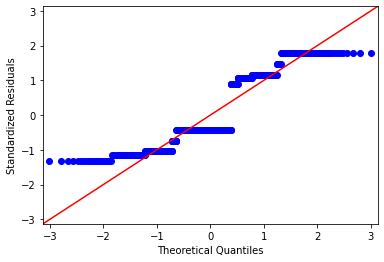

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [ ]:
#two-way Anova 

In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
formula = ' DiabetesPedigreeFunction~ C(Outcome) + C(AgeBin) + C(Outcome):C(AgeBin)'
model = ols(formula, df_copy).fit()
aov_table = anova_lm(model, typ=2)
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
eta_squared(aov_table)
omega_squared(aov_table)
aov_table.round(3)

sum_sq     df       F  PR(>F)  eta_sq  omega_sq
C(Outcome)             2.300    1.0  21.580   0.000   0.028     0.026
C(AgeBin)              0.471    4.0   1.105   0.353   0.006     0.001
C(Outcome):C(AgeBin)   0.566    4.0   1.329   0.258   0.007     0.002
Residual              80.252  753.0     NaN     NaN     NaN       NaN

In [50]:
#!pip install bioinfokit==1.0.3
#import bioinfokit.abalysis
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=df_copy, res_var='DiabetesPedigreeFunction', xfac_var=['AgeBin','Outcome'], anova_model='DiabetesPedigreeFunction~ C(Outcome) + C(AgeBin) + C(Outcome):C(AgeBin)')
res.tukey_summary

/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:331: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


group1      group2      Diff     Lower     Upper   q-value   p-value
0   (48-58, 1)  (48-58, 0)  0.113323 -0.161227  0.387873  1.852321  0.900000
1   (48-58, 1)  (28-38, 1)  0.025556 -0.182148  0.233260  0.552169  0.900000
2   (48-58, 1)  (28-38, 0)  0.151843 -0.052707  0.356394  3.331317  0.355534
3   (48-58, 1)  (18-28, 1)  0.004674 -0.209282  0.218631  0.098045  0.900000
4   (48-58, 1)  (18-28, 0)  0.176854 -0.008315  0.362024  4.286147  0.075811
5   (48-58, 1)  (58-68, 1)  0.108414 -0.263042  0.479870  1.309786  0.900000
6   (48-58, 1)  (58-68, 0)  0.207964 -0.082416  0.498345  3.213974  0.411326
7   (48-58, 1)  (38-48, 1)  0.137130 -0.080063  0.354322  2.833401  0.583083
8   (48-58, 1)  (38-48, 0)  0.151981 -0.068356  0.372318  3.095444  0.467917
9   (48-58, 0)  (28-38, 1)  0.087766 -0.151387  0.326920  1.646922  0.900000
10  (48-58, 0)  (28-38, 0)  0.038521 -0.197899  0.274941  0.731193  0.900000
11  (48-58, 0)  (18-28, 1)  0.117997 -0.126606  0.362600  2.164861  0.872584
12  (48-58, 0)  (18-28, 0)  0.063532 -0.156335  0.283398  1.296736  0.900000
13  (48-58, 0)  (58-68, 1)  0.004908 -0.385006  0.394822  0.056492  0.900000
14  (48-58, 0)  (58-68, 0)  0.094642 -0.219005  0.408288  1.354137  0.900000
15  (48-58, 0)  (38-48, 1)  0.023807 -0.223632  0.271246  0.431776  0.900000
16  (48-58, 0)  (38-48, 0)  0.038658 -0.211545  0.288862  0.693379  0.900000
17  (28-38, 1)  (28-38, 0)  0.126287 -0.027523  0.280098  3.684637  0.216854
18  (28-38, 1)  (18-28, 1)  0.030231 -0.135883  0.196345  0.816697  0.900000
19  (28-38, 1)  (18-28, 0)  0.151298  0.024395  0.278201  5.350354  0.006415
20  (28-38, 1)  (58-68, 1)  0.082858 -0.263258  0.428974  1.074323  0.900000
21  (28-38, 1)  (58-68, 0)  0.182408 -0.074764  0.439580  3.183035  0.426239
22  (28-38, 1)  (38-48, 1)  0.111574 -0.058688  0.281835  2.940793  0.536579
23  (28-38, 1)  (38-48, 0)  0.126425 -0.047831  0.300680  3.255867  0.391168
24  (28-38, 0)  (18-28, 1)  0.156518 -0.005636  0.318672  4.331681  0.069210
25  (28-38, 0)  (18-28, 0)  0.025011 -0.096663  0.146684  0.922466  0.900000
26  (28-38, 0)  (58-68, 1)  0.043429 -0.300804  0.387662  0.566174  0.900000
27  (28-38, 0)  (58-68, 0)  0.056121 -0.198511  0.310753  0.989080  0.900000
28  (28-38, 0)  (38-48, 1)  0.014714 -0.151687  0.181115  0.396816  0.900000
29  (28-38, 0)  (38-48, 0)  0.000138 -0.170347  0.170622  0.003619  0.900000
30  (18-28, 1)  (18-28, 0)  0.181529  0.044632  0.318425  5.950767  0.001190
31  (18-28, 1)  (58-68, 1)  0.113089 -0.236815  0.462992  1.450414  0.900000
32  (18-28, 1)  (58-68, 0)  0.212639 -0.049609  0.474886  3.638746  0.232476
33  (18-28, 1)  (38-48, 1)  0.141804 -0.036031  0.319640  3.578419  0.253883
34  (18-28, 1)  (38-48, 0)  0.156655 -0.025007  0.338318  3.869906  0.161260
35  (18-28, 0)  (58-68, 1)  0.068440 -0.264641  0.401521  0.922105  0.900000
36  (18-28, 0)  (58-68, 0)  0.031110 -0.208231  0.270451  0.583318  0.900000
37  (18-28, 0)  (38-48, 1)  0.039724 -0.102177  0.181626  1.256299  0.900000
38  (18-28, 0)  (38-48, 0)  0.024873 -0.121796  0.171542  0.761051  0.900000
39  (58-68, 1)  (58-68, 0)  0.099550 -0.301668  0.500768  1.113478  0.900000
40  (58-68, 1)  (38-48, 1)  0.028715 -0.323176  0.380607  0.366207  0.900000
41  (58-68, 1)  (38-48, 0)  0.043567 -0.310275  0.397408  0.552544  0.900000
42  (58-68, 0)  (38-48, 1)  0.070835 -0.194060  0.335729  1.200034  0.900000
43  (58-68, 0)  (38-48, 0)  0.055983 -0.211495  0.323462  0.939270  0.900000
44  (38-48, 1)  (38-48, 0)  0.014851 -0.170612  0.200314  0.359358  0.900000

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


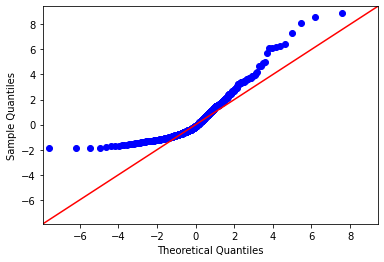

In [51]:
res = model.resid 
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

In [ ]:
#Ancova
#there is no sigificant effect of agebin on outcomes controlling for DiabetesPedigreeFunction

In [215]:
model = ols('DiabetesPedigreeFunction ~ C( Insulin) + C(AgeBin) + C(Insulin):C(AgeBin)', data=df_copy).fit()
aov_table = anova_lm(model, typ=2)
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
eta_squared(aov_table)
omega_squared(aov_table)
aov_table.round(3)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 184, but rank is 5
  use_f = bool_like(use_f, "use_f", strict=True, optional=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  use_f = bool_like(use_f, "use_f", strict=True, optional=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  J = float(r_matrix.shape[0])  # number of restrictions
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 736, but rank is 144
  use_f = bool_like(use_f, "use_f", strict=True, optional=True)


sum_sq     df      F  PR(>F)  eta_sq  omega_sq
C(Insulin)              8.996  184.0  0.532   0.752     NaN       NaN
C(AgeBin)                 NaN    4.0    NaN     NaN     NaN       NaN
C(Insulin):C(AgeBin)  101.090  736.0  1.494   0.001     NaN       NaN
Residual               45.230  492.0    NaN     NaN     NaN       NaN

In [216]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8545317649841309 6.379553269484508e-26


In [160]:
res = stat()
res.bartlett(df=df_copy, res_var='DiabetesPedigreeFunction', xfac_var='AgeBin')
res.bartlett_summary

Parameter    Value
0      Test statistics (T)  13.4476
1  Degrees of freedom (Df)   4.0000
2                  p value   0.0093

In [222]:
model_in = ols('DiabetesPedigreeFunction ~  C(Insulin):C(AgeBin)', data=df_copy).fit()
aov_table_in = anova_lm(model_in, typ=2)
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
eta_squared(aov_table_in)
omega_squared(aov_table_in)
aov_table_in.round(3)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 924, but rank is 270
  use_f = bool_like(use_f, "use_f", strict=True, optional=True)


sum_sq     df      F  PR(>F)  eta_sq  omega_sq
C(Insulin):C(AgeBin)  132.351  924.0  1.558     0.0   0.745     0.267
Residual               45.230  492.0    NaN     NaN     NaN       NaN

In [223]:
w, pvalue = stats.shapiro(model_in.resid)
print(w, pvalue)

0.8545317649841309 6.379553269484508e-26


In [211]:

df_copy.groupby('AgeBin')['Insulin'].describe().unstack()

       AgeBin
count  18-28     367.000000
       28-38     182.000000
       38-48     125.000000
       48-58      59.000000
       58-68      30.000000
mean   18-28     132.070845
       28-38     146.538462
       38-48     139.064000
       48-58     165.949153
       58-68     172.066667
std    18-28      85.872096
       28-38      82.076613
       38-48      67.011644
       48-58      93.025103
       58-68     148.316282
min    18-28      14.000000
       28-38      23.000000
       38-48      22.000000
       48-58      67.000000
       58-68     125.000000
25%    18-28      91.000000
       28-38     125.000000
       38-48     125.000000
       48-58     125.000000
       58-68     125.000000
50%    18-28     125.000000
       28-38     125.000000
       38-48     125.000000
       48-58     125.000000
       58-68     125.000000
75%    18-28     125.000000
       28-38     133.750000
       38-48     125.000000
       48-58     166.500000
       58-68     125.000000
max   

In [54]:
df_copy.groupby('AgeBin')['DiabetesPedigreeFunction'].describe().unstack()

       AgeBin
count  18-28     367.000000
       28-38     182.000000
       38-48     125.000000
       48-58      59.000000
       58-68      30.000000
mean   18-28       0.454379
       28-38       0.503945
       38-48       0.451856
       48-58       0.550017
       58-68       0.421333
std    18-28       0.323233
       28-38       0.355344
       38-48       0.326664
       48-58       0.361783
       58-68       0.203437
min    18-28       0.078000
       28-38       0.084000
       38-48       0.085000
       48-58       0.121000
       58-68       0.129000
25%    18-28       0.238000
       28-38       0.255000
       38-48       0.239000
       48-58       0.248000
       58-68       0.248750
50%    18-28       0.368000
       28-38       0.381500
       38-48       0.335000
       48-58       0.485000
       58-68       0.403500
75%    18-28       0.588500
       28-38       0.695000
       38-48       0.600000
       48-58       0.732500
       58-68       0.580250
max   

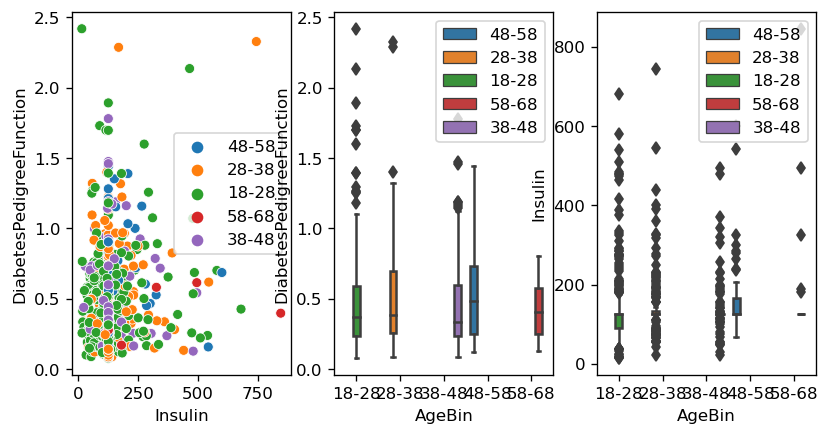

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1,ncols=3,dpi=120,figsize = (8,4))
sns.scatterplot(data=df_copy, x="Insulin", y="DiabetesPedigreeFunction", hue=df_copy.AgeBin.tolist(), ax=axs[0])
sns.boxplot(data=df_copy, x="AgeBin", y="DiabetesPedigreeFunction", hue=df_copy.AgeBin.tolist(), ax=axs[1])
sns.boxplot(data=df_copy, x="AgeBin", y="Insulin", hue=df_copy.AgeBin.tolist(), ax=axs[2])
plt.show()

In [212]:
#!pip install pingouin
import pingouin
from pingouin import ancova
ancova(data=df_copy, dv='Insulin', covar='DiabetesPedigreeFunction', between='AgeBin')

Source            SS   DF          F     p-unc       np2
0                    AgeBin  9.131269e+04    4   3.123421  0.014561  0.016236
1  DiabetesPedigreeFunction  8.219296e+04    1  11.245893  0.000838  0.014638
2                  Residual  5.532693e+06  757        NaN       NaN       NaN

In [213]:
def cohen_effect_size(X, y):

    group1 = X[y==0]
    group2 = X[y==1]
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1 = group1.shape[0]
    n2 = group2.shape[0]
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [214]:
effect_sizes = cohen_effect_size(X_train, y_train)
print(effect_sizes)

Pregnancies                -0.411273
Glucose                    -1.170344
BloodPressure              -0.307596
SkinThickness              -0.397965
Insulin                    -0.399077
BMI                        -0.688734
DiabetesPedigreeFunction   -0.344325
Age                        -0.511947
dtype: float64


In [101]:
from sklearn.utils import shuffle

def p_value_effect(X, y, nr_iters=1000):
    actual = cohen_effect_size(X, y)
    results = np.zeros(actual.shape[0])
    for i in range(nr_iters):
        target_shuffled = shuffle(y.values)
        results = results + (cohen_effect_size(X, target_shuffled).abs() >= actual.abs())
    p_values = results/nr_iters
    return pd.DataFrame({'cohen_effect_size':actual, 'p_value':p_values}, index=actual.index)

In [103]:
df_ces_p = p_value_effect(X_train, y_train, 10000)
print(df_ces_p)

                          cohen_effect_size  p_value
Pregnancies                       -0.411273   0.0000
Glucose                           -1.170344   0.0000
BloodPressure                     -0.307596   0.0004
SkinThickness                     -0.397965   0.0000
Insulin                           -0.399077   0.0000
BMI                               -0.688734   0.0000
DiabetesPedigreeFunction          -0.344325   0.0001
Age                               -0.511947   0.0000


In [224]:
from statsmodels.stats.power import TTestIndPower
# parameters for the analysis 
effect_size = 0.2
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 393.41


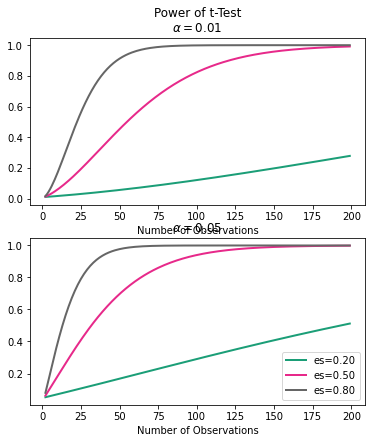

In [66]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

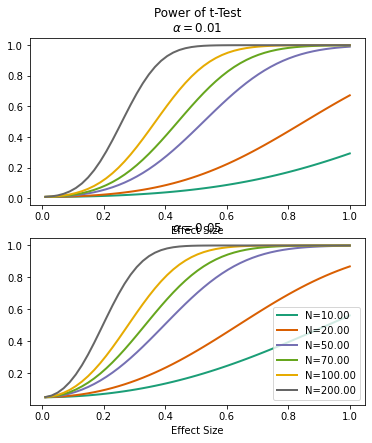

In [71]:
# power vs. effect size 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='es',
                                 nobs=np.array([10, 20, 50, 70, 100, 200]),
                                 effect_size=np.linspace(0.01, 1, 51),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='es',
                                 nobs=np.array([10, 20, 50, 70, 100, 200]),
                                 effect_size=np.linspace(0.01, 1, 51),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

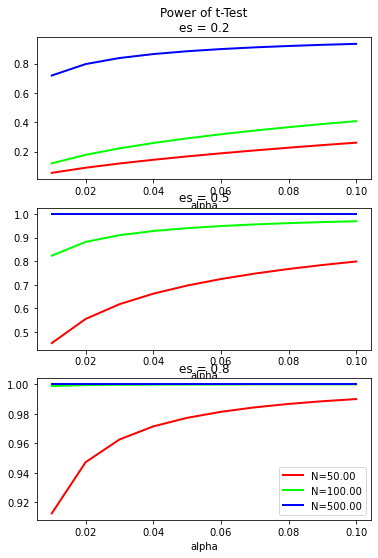

In [72]:
# power vs. significance level

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.2,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title='Power of t-Test' + '\n' + r'es = 0.2')
ax.get_legend().remove()
ax = fig.add_subplot(3,1,2)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.5,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.5') 
ax.get_legend().remove()
ax = fig.add_subplot(3,1,3)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.8,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.8')
fig.subplots_adjust(top = 1.8)

In [227]:
import scipy
#+
num_runs = 5000
effectSize = 0.2

# perform power analysis to get sample size
power_analysis = TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject
#-

/var/folders/hb/jfzfsg696wj28yqs36pgqdvm0000gn/T/ipykernel_73415/162370751.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sampleSize = np.int(np.ceil(sampleSize))


0.8158